In [1]:
# Change here using YOUR first and last names
fn1 = "Victoire"  
ln1 = "de_Termont"  
fn2 = "Sarah"  
ln2 = "Jallot"  
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["lab_2_svd_pca", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

lab_2_svd_pca_de_termont_victoire_and_jallot_sarah.ipynb


# Exercise 1 - Linear algebra

### Question 1

In [2]:
import numpy as np

In [3]:
# Building the function to return both sides of the equation
def equation_terms(n,p):
    X = np.random.normal(0, np.sqrt(5), size=(n,p)) # Defining the gaussian matrix 
    l = 10e-5 # defining lambda
    y = np.random.uniform(-1, 1, n) # Defining y with uniform distribution on [-1,1]
    A = X@X.T + l*np.identity(n)
    B = X.T@X + l*np.identity(p)
    return X.T@np.linalg.solve(A, y), np.linalg.solve(B, X.T@y) # linalg.solve(a,b) returns x st ax=b

# Building the function to know if we have equality or not

def are_equal(A, B):
    return np.allclose(A,B) # Returns equality with a little tolerance (because of calculation approximations)

### a)

In [4]:
LHS, RHS = equation_terms(100,2000)
are_equal(LHS, RHS)

True

### b)

In [5]:
LHS, RHS = equation_terms(2000,100)
are_equal(LHS, RHS)

True

### Question 2

In [6]:
# Defining functions to compute the left and right side of the equation respectively for a given (X,y) 
# with X of size (n,p).

In [7]:
def left_function(X,y):
    (n,p) = X.shape
    l = 10e-5
    A = X @ X.T + l * np.identity(n)
    return X.T @ np.linalg.solve(A, y)

Note that we take X and y as an input, otherwise we are going to compute them once again every time inside our functions which is not how the equation works.  

In [8]:
def right_function(X,y):
    (n,p) = X.shape
    l = 10e-5
    B = X.T @ X + l * np.identity(p)
    return np.linalg.solve(B, X.T @ y)

In [9]:
import time

In [10]:
# Defining a matrix that shows the calculating time difference between the 2 methods
def time_comp(size_M):
    M_range = np.arange(1, size_M, 50)
    M = np.zeros([len(M_range), len(M_range)])
    for i, n in enumerate(M_range): # enumerate enables to take all the values of another vector 
        for j, p in enumerate(M_range): 
           
            X = np.random.normal(0, np.sqrt(5), size=(n,p))
            y = np.random.uniform(-1, 1, n)
            
            t0 = time.time()
            left_function(X,y)
            t1 = time.time() - t0
            
            t0_1 = time.time()
            right_function(X,y)
            t2 = time.time() - t0_1
            
            M[i, j] = t2 / t1
    return M

In [11]:
# Just checking the indices we are using in our matrix here to make sure we understand the graph
for i, n in enumerate(np.arange(1, 200, 50)): # enumerate enables to take all the values of another vector 
        for j, p in enumerate(np.arange(1, 200, 50)):
            print("|p/n ratio",round((p/n),1),"|Matrix index",(i,j),"|(n,p) values",(n,p))

|p/n ratio 1.0 |Matrix index (0, 0) |(n,p) values (1, 1)
|p/n ratio 51.0 |Matrix index (0, 1) |(n,p) values (1, 51)
|p/n ratio 101.0 |Matrix index (0, 2) |(n,p) values (1, 101)
|p/n ratio 151.0 |Matrix index (0, 3) |(n,p) values (1, 151)
|p/n ratio 0.0 |Matrix index (1, 0) |(n,p) values (51, 1)
|p/n ratio 1.0 |Matrix index (1, 1) |(n,p) values (51, 51)
|p/n ratio 2.0 |Matrix index (1, 2) |(n,p) values (51, 101)
|p/n ratio 3.0 |Matrix index (1, 3) |(n,p) values (51, 151)
|p/n ratio 0.0 |Matrix index (2, 0) |(n,p) values (101, 1)
|p/n ratio 0.5 |Matrix index (2, 1) |(n,p) values (101, 51)
|p/n ratio 1.0 |Matrix index (2, 2) |(n,p) values (101, 101)
|p/n ratio 1.5 |Matrix index (2, 3) |(n,p) values (101, 151)
|p/n ratio 0.0 |Matrix index (3, 0) |(n,p) values (151, 1)
|p/n ratio 0.3 |Matrix index (3, 1) |(n,p) values (151, 51)
|p/n ratio 0.7 |Matrix index (3, 2) |(n,p) values (151, 101)
|p/n ratio 1.0 |Matrix index (3, 3) |(n,p) values (151, 151)


In [12]:
# Plotting a heatmap to visualize time difference between the 2 sides of the equation
import seaborn 
time_heatmap = time_comp(200)
print(seaborn.heatmap((time_heatmap)))

AxesSubplot(0.125,0.11;0.62x0.77)


In [13]:
# Printing the matrix indices for one example
print(round(time_heatmap[3,0],1)) # corresponds to a p/n ratio of 1/151
print(round(time_heatmap[0,3],1)) # corresponds to a p/n ratio of 151

0.1
18.3


Our graph shows us how long it takes to plot the right side of the equation relatively to the left one for values of n and p ranging in [1, 51, 101, 151]. 
We see that when p is bigger than n, it becomes inefficient to compute the RHS of the equation relatively to the LHS (upper region of our matrix).  

Intuitively this is logical. We want to minimise the number of computations incurred by python to compute the L- or RHS.  
In particular, when p is bigger than n, we are manipulating bigger matrices on the RHS :   
- np.linsolve has to solve more equations to return an answer.   
- In the same way, the dot product takes more time.   

So, it is not surprising that the quickest side to compute is the one with the smaller matrices.  

# Exercise 2 - Random matrix spectrum

### Question 3

#### Methodology in choosing parameters: 

In all cases, if X is a random variable and that its expectation exists, X - E(X) is centered
- If X is binomial, V(X) = (1-p)/p^2 : if I choose p = 0.5, we have V(X) = 2  
- If X follows a Poisson law of parameter lambda , V(X) = lambda : I choose lambda = 2  
- If X follows a continuous uniform law on [a,b], E(X) = (a+b)/2 and V(X) = (b-a)^2/12  
I choose a = -b (b>0) to have E(X) = 0 and we want 4*(a^2) /12 = 2 -> a = sqrt(6)  

In [14]:
def X_generator(n,p,probalaw):
    if probalaw == 'binomial':
        M = np.random.binomial(8,1/2, size = (n,p)) - 4 # -4 to have a mean of 0, -4 to all numbers of the matrix
    elif probalaw == 'poisson':
        M = np.random.poisson(2, size = (n,p))-2
    elif probalaw == 'uniform':
        M = np.random.uniform(-np.sqrt(6), np.sqrt(6), size = (n,p))
    return(M)    

In [15]:
# Checking X_generator for (n,p) = (100,200)

print(round(X_generator(100,200,'binomial').mean(),2))
print(round(X_generator(100,200,'binomial').var(),2))
print(round(X_generator(100,200,'poisson').mean(),2))
print(round(X_generator(100,200,'poisson').var(),2))
print(round(X_generator(100,200,'uniform').mean(),2))
print(round(X_generator(100,200,'uniform').var(),2))

-0.0
1.99
-0.01
2.0
-0.01
2.0


### Question 4

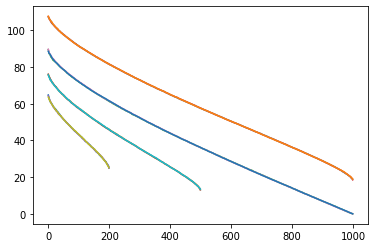

In [16]:
# Plotting the eigenvalues of X for each value of p and n = 1000
%matplotlib inline
import matplotlib.pyplot as plt
p_range = [200,500,1000,2000]
names = ['binomial','poisson','uniform']
n = 1000
for probalaw in names : 
    for p in p_range : 
        X = X_generator(n,p,probalaw)
        (u,eigvals,v) = np.linalg.svd(X)
        plt.plot(eigvals)

We are plotting 12 curves and only get 4.
This means that for each value of p, the singular values of our matrices are the same even though they do not follow the same law!

### Question 5

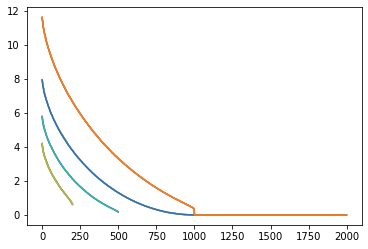

In [17]:
# Our new goal is to plot the spectrum of X.T@X/n
# We indicate that X.T@X is hermitian so that python doesn't compute complex values
p_range = [200,500,1000,2000]
names = ['binomial','poisson','uniform']
n = 1000
for probalaw in names : 
    for p in p_range : 
        X = X_generator(n,p,probalaw)
        eig = np.linalg.eigvalsh(X.T @ X / n)[::-1] #[::-1] allows to switch the axes of the graph
        plt.plot(eig)

As we saw earlier, we are plotting 12 curves and only get 4.
This means that for each value of p, the eigenvalues of our X.T@X/n are the same even though the Xes do not follow the same law!

# Exercise 3 - Power method

### Question 6

In [18]:
# Defining our (random) matrix X and its size
(n,p) = (100,2000)
X = np.random.normal(0, np.sqrt(5), size = (n,p))

In [19]:
# Defining the power method function
def power_method(X, max_iter, u, v):
    all_u = np.zeros([max_iter, u.shape[0]])
    all_v = np.zeros([max_iter, v.shape[0]])
    for i in range(max_iter) : 
        u = X@v
        v = X.T@u
        u = u / np.linalg.norm(u)
        all_u[i, :] = u
        v = v / np.linalg.norm(v)
        all_v[i, :] = v
    return (all_u, all_v, u, v)

(Note that u is directly overwritten as X@v in the function. Thus, introducing a new u does not change anything)

In [20]:
# Testing that our function actually returns something
(all_u, all_v, u_converge, v_converge) = power_method(X, 1000, np.random.uniform(-1, 1, size = (n)), np.random.uniform(-1, 1, size = (p)))

### Question 7

Text(0.5, 1.0, 'v convergence')

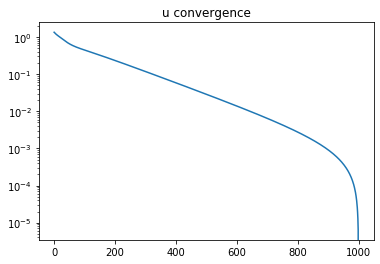

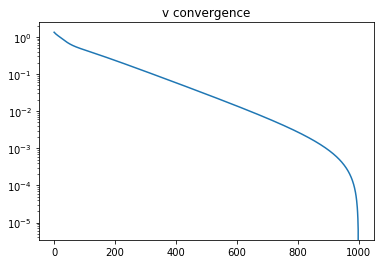

In [21]:
(u,v) = (np.ones(n), np.ones(p))
(all_u, all_v, u_converge, v_converge) = power_method(X, 1000, u, v)

# Substracting the last vector (supposedly the closest to convergence) from my matrix, u_converge
# On this graph, we are looking at the distance (the norm) between each u[i] and u_converge, 
# the output of our algorithm. We see that this distance converges to zero for n = approx 1000.
# Using the logarithmic function to "see the convergence" from closer
from numpy.linalg import norm

fig = plt.figure(1)
plt.semilogy(norm(all_u - u_converge, axis=1))
plt.title("u convergence")

fig = plt.figure(2)
plt.semilogy(norm(all_v - v_converge, axis=1))
plt.title("v convergence")

In [22]:
# Showing that (u,v) converges to the largest singular vector associated with the largest singular value of X
# Note that the max eigenvalue is necessarily positive, otherwise X is null as all its eigenvalues are non negative
(u, singvals_X, vh) = np.linalg.svd(X)
max_singval = max(singvals_X)
np.allclose(u_converge.T@X@v_converge/max_singval, 1)

True

#### Bonus : Mathematical explanation of the result


1. $(u_n, v_n)$ are actually sequences that can be defined as follows :  
Let $(u_k,v_k)$ be the kth output of u and v calculated in the power method  
for k in [0, max_iter] : 
$$u(k+1) = (X @ X.T) * u(k) * norm(u(k+1) = B @ u_k$$ if we denote B = X @ X.T and except the normalisation factor
$$v(k+1) = (X.T @ X) * v(k) * norm(v(k+1) = A @ v_k $$ if we denote A = X.T@X and except the normalisation factor

2. A is symmetric, so A is diagonalisable and there exists B an orthonormal basis of $R^p$ consisting of A's eigenvectors. Let us note that the singular values of X are the roots of the eigenvalues of A.   
i) We have : for all n in N, $v_{n} = A^n @ v_0$  (excluding the normalisation for now).  
ii) As A is diagonalisable, we can rewrite $v_0$ as a combination of the eigenvectors associated to A in descending order.  
 $$\sum_{k=1}^{p} \beta_k*c_k = v_0$$ where the cks form an orthonormal basis of Rp. Note that $c_1$ is associated to $\Lambda_{max}$.  
iii) Given i), we then obtain : 
 $$\sum_{k=1}^{p} \beta_k * c_k * \Lambda_k^n = v_n$$
By factorising by $\beta_1 * \Lambda_{max}^n$, as $\Lambda_i < \Lambda_{max}$ for any i in p, we get that $v_n$ is equivalent to $\Lambda_{max}^n * c_1 * \beta_1$.  
iv) Now we are going to consider the normalisation factor.  
$$ norm(v_n)= norm(A^n*v0)=\sqrt{(\sum_{k=1}^{p} \beta_k^2 * c_k * \Lambda_k^{2n})}$$.  
If we factorise this by $\beta_1*\Lambda_{max}^{(n)}$, we obtain that the norm in question is equivalent to $\beta_1*\Lambda_{max}^{(n)}$ because the other term in the product converges to 1. Indeed, recall that $\Lambda_i < \Lambda_{max}$ for any i in p.
v) So, we have shown that $v_n/norm(v_n)$ converges to $c_1$ which is the eigenvector associated to the biggest eigenvalue of A. As X's eigenvalues are the roots of A's, by doing the same reasoning on $u_n$ using the matrix B, we get that $(u_n, v_n)$ converges to the eigenvectors associated to X's maximum singular value. 

Indeed, we have the following relation... 
If we define (U,V) in $M_p(R)$ and $M_n(R)$ respectively such that $ X = U * D_r * V.T$ (singular value decomposition), where $D_r$ is a diagonal matrix with the r distinct singular values of X ordered in descending order on its diagonal and 0's elsewhere.  
Then,  $X.T*X = U * D_r^2 * U.T$ and  $X*X.T = VD_r^2V.T$

### Question 8

In [23]:
# Providing two sets leading to different eigenvectors : there is a sign ambiguity
(u1, v1) = (np.ones(n), np.ones(p))
(u2, v2) = (-u1,-v1)
max_iter = 1000

In [24]:
# Showing that these two sets converge to different (u_converge, v_converge)
(all_u1, all_v1, u_converge_1, v_converge_1) = power_method(X, max_iter, u1, v1)
(all_u2, all_v2, u_converge_2, v_converge_2) = power_method(X, max_iter, u2, v2)

# If at convergence, we have the same vectors, then the computations I am going to make should 
# render a null vector of dimension 1,2 (modulo computation approximations)
((np.linalg.norm(u_converge_1 - u_converge_2)),np.linalg.norm(v_converge_1 - v_converge_2))

(2.0, 2.0)

For the initial vector X: 
Due to the construction of the algorithm and in particular to the normalization process, the only possibles outcomes for u_converge and v_converge (u_converge, v_converge) and (-u_converge, -v_converge)

So, our two initial sets of vectors converged to two different pairs. 
Both the pairs (u1,v1) and (-u1,-v1) have the same sign. So -u1.T@X@(-v1) = (u1.T@X@v1) by looking at the sign 

### Question 9

In [25]:
# We know that (u,v) converges to the eigenvector associated to X's largest maximum value
# We set lambda to be u.T@X@v : we are approximating X's largest singular value
lambda_test = u_converge_1.T@X@v_converge_1

# For additional reassurance, we can test using np's built in function that we indeed have X's largest singular value
(u, singvals_X, vh) = np.linalg.svd(X)
print('Test is', np.allclose(max(singvals_X),lambda_test))
# If the test returns True, we have confirmation that lambda_test is the maximal singular value of X

Test is True


In [26]:
# Displaying lambda max for better visualisation: 
eig = np.linalg.eigvalsh(X.T@X)
print('the (estimated) largest singular value of X is:', lambda_test)
print('the (true) largest singular value of X is:', np.sqrt(max(eig)))

the (estimated) largest singular value of X is: 121.01025486520001
the (true) largest singular value of X is: 121.01025521573328


### Question 10 - Bonus : approximate the second largest singular value of X

In [27]:
# Initialising M = X - lambda_max*orthogonal_to_v_converge
lambda_max = lambda_test
M = X - lambda_max * np.matrix(u_converge_1).T @ np.matrix(v_converge_1)
M = np.array(M)

In [28]:
# Running the power method for our newly defined M
all_uM, all_vM, u_convergeM, v_convergeM = power_method(M, 1000, u1, v1)
lambda_test2 = np.sqrt(np.linalg.norm(M.T @ M @ v_convergeM.T))

In [29]:
print('Test is', np.allclose(np.sqrt(eig[1999-1]),lambda_test2))
# If the test returns True, we have confirmation that lambda_test2 is the second maximal singular value of X

Test is True


In [30]:
# Displaying the second lambda max for better visualisation:
print('the second (estimated) largest singular value of X is:', lambda_test2)
print('the second largest singular of X is:', np.sqrt(eig[1999-1]))

the second (estimated) largest singular value of X is: 120.58940138813524
the second largest singular of X is: 120.58940103637869


# Exercise 4 - PCA

### Question 11

In [31]:
from os import path
import pandas as pd

In [32]:
# Importing the data 
# sep = ';' seperates the data in columns every time there is ;
url = 'http://josephsalmon.eu/enseignement/TELECOM/SD204/defra_consumption.csv'
df = pd.read_csv(url, sep = ';', index_col = 'Unnamed: 0')

In [33]:
df.head()

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


### Question 12

In [34]:
# Transforming the data into a matrix (not always necessary)
data_to_process = df.loc[:,'England': 'N Ireland']

In [35]:
import sklearn 
from sklearn import preprocessing

In [36]:
# Considering that the variables are the items, and the observations 
from sklearn import preprocessing
X = preprocessing.scale(data_to_process, axis = 0)

# Checking that the data is scaled
print(np.round(X.mean(axis=0),2))
print(X.var(axis=0))

[ 0. -0. -0.  0.]
[1. 1. 1. 1.]


### Question 13

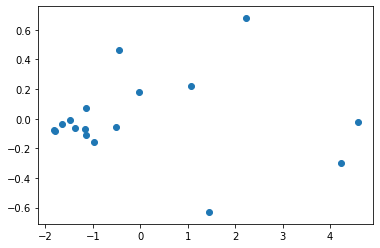

In [37]:
# Getting the principal components of X for n = 2. 
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca.fit(X)

# Applying the dimensionality reduction on X. X_pca contains the coordinates of each data 
# in the space generated by the principal components. 
X_pca = pca.transform(X)

# Then plotting the projection of X in 2D.
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1])

### Question 14

In [38]:
# Repeat the previous question for the space generated by three axes -> we want a 3D graph
# We perform the PCA for 3 vectors 
pca_1 = PCA(n_components = 3) # new dimension
pca_1.fit(X)
X_pca_1 = pca_1.fit_transform(X)

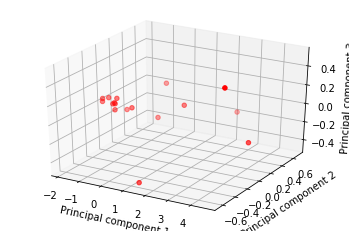

In [39]:
# Print the graph in 3D

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X_pca_1[:,0]
y = X_pca_1[:,1]
z = X_pca_1[:,2]

ax.scatter(x, y, z, c = 'r', marker = 'o')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

plt.show()

### Question 15

### a. Diagonalization of X.T @ X

In [40]:
#Diagonalising X.T@X, without forgetting to specify it is Hermitian
A = X.T @ X
(A_eigvals, A_eigvects) = np.linalg.eigh(A)

# The eigenvalues and corresponding eigenvectors are sorted in ascending order by default
A_eigvals = A_eigvals[::-1]
A_eigvects = np.flip(A_eigvects, axis = 1)

# Finally getting the diagonal matrix
A_diag = np.diag(A_eigvals)
A_diag

array([[66.00910989,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.3130295 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.61117233,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.06668829]])

###### Project the n points encoded by X over the span of the eigenvectors associated to the two (respectively three) largest eigenvalues.

In [41]:
# Projection on a 2D space spanned by the two eigenvectors of A associated to the largest and second largest eigenvalues
# We recall that projection of a on b is (<a,b>/||a||^2)*b. We know that v1 and v2 are already normalised.
# So, to get the projection coordinates, we do the matrice product
projection_coordinates2D = X @ A_eigvects[:,:2]

# Getting the projection coordinates for our 3D space. The eigenvectors are still normalised 
projection_coordinates3D = X @ A_eigvects[:,:3]

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

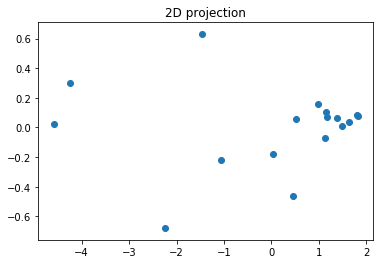

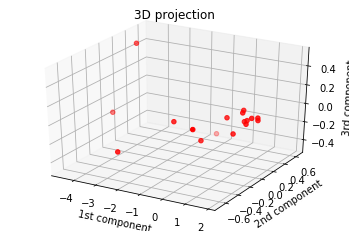

In [43]:
# For a reason similar to q8, our projections are exactly the opposite of those obtained through the PCA method. 

fig = plt.figure(1)
plt.scatter(projection_coordinates2D[:,0], projection_coordinates2D[:,1])
plt.title('2D projection')

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projection_coordinates3D[:, 0], projection_coordinates3D[:, 1],projection_coordinates3D[:, 2], c='r', marker='o')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')
plt.title('3D projection')
plt.show()

### b. SVD - Projected on the right vectors

In [44]:
# Compute the SVD of X. 
# Project the n points encoded by X over the span of the RIGHT singular vectors associated to the two 
# (respectively three) largest singular values

In [45]:
(X_left, X_singvals, X_right) = np.linalg.svd(X, full_matrices=False)
X_singvals # they are classified in the decreasing order and after ther

array([8.12459906, 1.14587499, 0.78177512, 0.25824075])

In [46]:
# Performing SVD on X NB : PROJECTED ON THE RIGHT VECTORS
(left_vectors, sigma, right_vectors) = np.linalg.svd(X, full_matrices=False)

# 2D projection on the right vectors because it doesn't make sense to do it on the left vectors.
projection_coord_svd = X@right_vectors[:,:2]

# 3D projection on the right vectors because it doesn't make sense to do it on the left vectors.
projection_coord_svd3D = X@right_vectors[:,:3]

In [47]:
# Verifying that X_right is orthonormal
np.allclose(np.eye(4), X_right.T @ X_right)

True

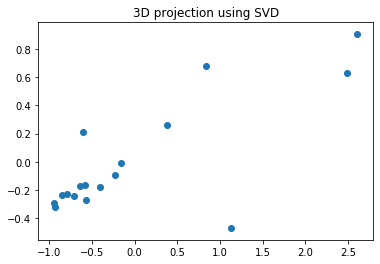

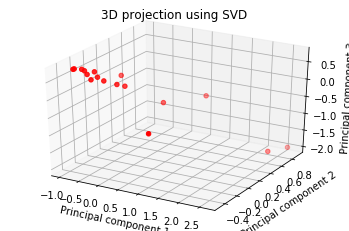

In [48]:
# We plot the graph in 2D

fig = plt.figure(1)
plt.scatter(projection_coord_svd[:,0], projection_coord_svd[:,1])
plt.title('3D projection using SVD')

# We plot the graph in 3D

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projection_coord_svd3D[:, 0], projection_coord_svd3D[:, 1],projection_coord_svd3D[:, 2], c='r', marker='o')
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')
plt.title('3D projection using SVD')

plt.show()

### c. Evaluate the difference in timing for the two methods

In [49]:
# we set a time before the beginning of the first and after the end, same for the second and we compare B

In [50]:
# Diagonalising method 2D
t0 = time.time()
A = X.T @ X
(A_eigvals, A_eigvects) = np.linalg.eigh(A)
A_eigvects = np.flip(A_eigvects, axis = 1)
projection_coordinates = X @ A_eigvects[:,:2]
t1 = time.time() - t0

# SVD method 2D
t0_1 = time.time()
(left_vectors, sigma, right_vectors) = np.linalg.svd(X)
projection_coord_svd = X @ right_vectors[:,:2]
t2 = time.time() - t0_1

In [51]:
# Which one if the quickest in 2D?
quickest = ''
if t1 < t2:
    quickest = 'diagonalising'
else:
    quickest = 'SVD'
print('The quickest solution is', quickest, 'in dim 2')

The quickest solution is diagonalising in dim 2


In [52]:
# Diagonalising method 3D
t0 = time.time()
A = X.T@X
(A_eigvals, A_eigvects) = np.linalg.eigh(A)
A_eigvects = np.flip(A_eigvects, axis=1)
projection_coordinates = X@A_eigvects[:,:3]
t3 = time.time() - t0

# SVD method 3D
t0_1 = time.time()
(left_vectors, sigma, right_vectors) = np.linalg.svd(X)
projection_coord_svd = X@right_vectors[:,:3]
t4 = time.time() - t0_1

In [53]:
# Which one if the quickest in 2D?
quickest = ''
if t3 < t4:
    quickest = 'diagonalising'
else:
    quickest = 'SVD'
print('The quickest solution is', quickest, 'in dim 3')

The quickest solution is SVD in dim 3


#### Intuition on the timing output

For the chosen matrices, the SVD method seems quicker.

It is -intuitive that the answer should be the same for 2D and 3D, as the only operation to switch from 2D to 3D is the same for the two methods

# Exercise 5 - Analysis of the auto-mpg dataset

##### We aim at predicting cars consumption based on several characteristics : cylinders, displacement, horsepower, weight, acceleration, year, country and cars name. The output coding cars consumption (more precisely the “mpg”, i.e.,the distance ridden in miles for a gallon of oil) is written y ; For the first question we do not use the qualitative feature origin and car name. For all questions, do not use car name

### Question 16

In [54]:
# Getting the names we need from the auto-mpg.names file
import pandas as pd
auto_mpg_names = pd.read_csv("auto-mpg.names", sep = r":\s+", comment = '#', error_bad_lines = False, skiprows = 28)

# Getting the portion of table we need and removing the indexes in front by splitting after the period
auto_mpg_names = (auto_mpg_names.iloc[1:10,0].str.split('.', expand = True)).iloc[:,1]
auto_mpg_names

/Users/victoiredetermont/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


1              mpg
2        cylinders
3     displacement
4       horsepower
5           weight
6     acceleration
7       model year
8           origin
9         car name
Name: 1, dtype: object

In [55]:
# Importing data 
# I keep an index as there is missing data to be removed in mpg column
# I give names to my columns 

df = pd.read_csv('auto-mpg.data-original', sep = r"\s+", names = auto_mpg_names)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [56]:
# Taking the spaces out of my column names
df.columns = df.columns.str.replace(' ', '')

# Ensuring that the first two digits of the year are encoded in case we have more recent years to add
df.loc[:, 'modelyear'] = df.loc[:,'modelyear'] + 1900

# Dropping the car names as we won't use the column 
df = df.drop(['carname'], axis=1)

In [57]:
# A quick look at our dataset confirms that the data is very old! When predicting more recent cars, 
# we should be vigilant with our model.
max(df['modelyear'])

1982.0

In [58]:
# Checking the shape of our dataframe before dropping the missing values
df.shape

(406, 8)

In [59]:
# Removing lines with missing data (NaN written instead of missing values)
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970.0,1.0


In [60]:
# Checking the shape of our dataframe now
df.shape

(392, 8)

### Question 17

In [61]:
# Old - Using a mask to reaffect the origin to a country name
#df.loc[:,'origin'][df.loc[:,'origin']==1] = 'USA'
#df.loc[:,'origin'][df.loc[:,'origin']==2] = 'Europe'
#df.loc[:,'origin'][df.loc[:,'origin']==3] = 'Japan'
#df.head()

In [62]:
# Installing category encoders
# pip install category_encoders (on a terminal and not on Python)

In [63]:
# Using a category encoder to code the origin
# By default the category encoder sets origin to three columns as there is no intercept in our dataframe.
import category_encoders as ce
encoder = ce.OneHotEncoder(cols = ['origin'])
encoder.fit(df)
df = encoder.transform(df)
df.head()
df.shape

(392, 10)

In [64]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin_1,origin_2,origin_3
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970.0,1,0,0


### Question 18

In [65]:
# We recall that we want to predict car consumption (mpg) which is written y 

# We randomly select 9 rows in our dataframe to make the training data for us to fit the model, making sure that 
# we have a diversified sample

# iloc for positions, loc for labels 
idx = np.random.choice(X.shape[0], size = 9, replace = False)
idx[-1] = 388 # we want to be sure to have at least 2 different origins
df2 = df.iloc[idx,:]

In [66]:
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin_1,origin_2,origin_3
15,15.0,8.0,383.0,170.0,3563.0,10.0,1970.0,1,0,0
7,14.0,8.0,440.0,215.0,4312.0,8.5,1970.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970.0,1,0,0
6,14.0,8.0,454.0,220.0,4354.0,9.0,1970.0,1,0,0
20,24.0,4.0,113.0,95.0,2372.0,15.0,1970.0,0,1,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970.0,1,0,0
18,15.0,8.0,400.0,150.0,3761.0,9.5,1970.0,1,0,0
9,15.0,8.0,390.0,190.0,3850.0,8.5,1970.0,1,0,0
402,44.0,4.0,97.0,52.0,2130.0,24.6,1982.0,0,0,1


In [67]:
# Building the vectors and matrices for regression

# we want to build x the matrix used for regression and y our target (mpg)
# We consider only columns from Cylinders to origin_Japan for x, eg quantitative variables

X_data = df2.iloc[:,1:]
Y_data = df2.iloc[:,0]

In [68]:
# Doing the regression
# No intercept column need as it is automatically taken into account by Python here 

from sklearn import linear_model
lm = linear_model.LinearRegression(fit_intercept=True)

# The lm.fit() function fits a linear model
model = lm.fit(X_data, Y_data) 

# We want to use the model to make predictions , so we’ll use lm.predict()
predictions = lm.predict(X_data)

# We also want to display theta 
theta = model.coef_ 

# We print the true values and the theta of our model
print('the predictions are:', predictions)
print('the true values are:', Y_data)
print('theta for the model is:', theta)

the predictions are: [15.08316938 14.15932336 16.87124399 13.61822668 24.         16.74424014
 15.1561783  15.36761816 44.        ]
the true values are: 15     15.0
7      14.0
3      16.0
6      14.0
20     24.0
2      18.0
18     15.0
9      15.0
402    44.0
Name: mpg, dtype: float64
theta for the model is: [-7.04699873e-01 -2.83729720e-02 -1.07978533e-02  1.03961068e-03
 -2.67098926e-01  1.81427139e+00 -1.76174968e-01  2.49856860e-02
  1.51189282e-01]


In [69]:
# This is the R² score of our model ie the percentage of explained variance of the predictions
print('R² is ',lm.score(X_data, Y_data))

R² is  0.9964645502849903


In [70]:
# Printing theta 
pd.DataFrame(data=theta, index=df2.columns[1:], columns=['Coeff'])

,Coeff
cylinders,-0.704700
displacement,-0.028373
horsepower,-0.010798
weight,0.001040
acceleration,-0.267099
modelyear,1.814271
origin_1,-0.176175
origin_2,0.024986
origin_3,0.151189


In [71]:
model.intercept_

-3541.548347551718

#### Observations:  
Model year is the variable that most impacts mpg in this model, followed by acceleration and cylinders.

### Question 19

#### Now, get the least-squares estimator and the prediction vector (with intercept) over the whole dataset, after performing scaling/centering 

In [72]:
# as we are making the regression manually, we have to add the intercept column
# we must add the column after it is centered and scaled because otherwise just a colum of O

In [73]:
# Scaling / centering data 
df_to_process = df.loc[:, 'mpg':'origin_3'] # we want all the rows but only quantitative columns 
df_scaled = preprocessing.scale(np.asmatrix(df_to_process), axis = 0) # we scale / center data

# Checking that our re-scaling worked
print(np.around(np.mean(df_scaled, axis =0),2))
print(np.var(df_scaled, axis=0))

[ 0. -0. -0. -0. -0.  0. -0.  0.  0.  0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [74]:
# Writing the vector Y and the matrix X for regression 
X_data1 = df_scaled[:,1:]
Y_data1 = df_to_process.iloc[:,0] # we don't want to scale Y

In [75]:
# Check that we have all columns taken into account
print(X_data1.shape)
print(Y_data1.shape)

(392, 9)
(392,)


In [76]:
# Doing the regression for all rows 
model_total = lm.fit(X_data1, Y_data1)
# Getting the predictions : we aren't printing them, it would be too long
predictions_total = lm.predict(X_data1)
theta1 = model_total.coef_ 

In [77]:
# Printing theta1
pd.DataFrame(data=theta1, index=df2.columns[1:], columns=['Coeff'])

,Coeff
cylinders,-0.834272
displacement,2.506019
horsepower,-0.699009
weight,-5.692543
acceleration,0.217956
modelyear,2.858709
origin_1,-0.751539
origin_2,0.521830
origin_3,0.408048


In [78]:
model_total.intercept_

23.44591836734694

#### Which variables seem to best explain gasoline consumption according to your model ?

The best coefficient to explain the miles per gallon is weight. As we would have inferred intuitively, the heavier the car, the less miles per gallon it can complete. 

Model year and displacement are the second best coefficients to explain mpg. 
The higher the displacement and the more recent the model year, the more miles per gallon are completed by the car. 

If we hadn't normalised the data, some features would've had disproportionate weights in explaining the miles per gallon. For instance, we could not have compared weight to origin. 

### Question 20

#### Compute ||r||^2 (the square norm of the residual vector, r = y - Xθ)

In [79]:
print('the shape of y is: ', Y_data1.shape)
print('the shape of the prediction vector is: ', predictions_total.shape)

the shape of y is:  (392,)
the shape of the prediction vector is:  (392,)


In [80]:
# predictions = X*theta 
residuals = Y_data1 - predictions_total
residuals_norm = np.linalg.norm(residuals)**2
print('the square norm of the residual vector is: ', residuals_norm)

the square norm of the residual vector is:  4187.391678082952


In [81]:
# If we want to get the MSE, we should divide by len(residuals)
residuals_norm/len(residuals)

10.682121627762633

#### Check numerically the given equality

In [82]:
# Building a function to obtain the left part of the equality depending on n
def left(n):
    y = sum(Y_data1[:n]) / n
    return np.linalg.norm(Y_data1 - y)**2 # we can write only y : substracts row by row 

In [83]:
# Building a function to obtain the right part of the equality depending on n
def right(n):
    y = sum(Y_data1[:n]) / n
    return residuals_norm + np.linalg.norm(predictions_total - y)**2

In [84]:
# Testing the equality for a single value of n = 10
np.isclose(left(len(residuals)), right(len(residuals)))

True

### Question 21

##### Assume that you observe a new car with the following features:
cylinders : 6 , displacement : 225 , horsepower : 100  , weight : 3233  , acceleration : 15.4  , year : 2017 , origin : USA 

##### Can you predict its consumption in this model? Beware of the year encoding

In [85]:
# Before starting, we can see that we have to do something to the year
# In the dataset we have, years are only the last 2 numbers, and all signify 19..
# So we have to modify the number in order to have 19.. to compare it to 2017
# also, we don't know where the car comes from so we will not use the origin columns 
# and then we will scale it again

In [86]:
# Building the vector with the information coming from the new car and forcing it into the right shape. 
new_car = np.array([6, 225, 100, 3233, 15.4, 2017, 1, 0, 0]).reshape(1,-1)
new_car.shape

(1, 9)

In [87]:
# pipeline :

# You want to have mean 0 and var 1: first you fit your model
# you need to use the same transformation as before for new data using the same transformation as before 
# pipeline stores the information from previous experience and then predicts the result

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('reg', linear_model.LinearRegression(fit_intercept=True))])

# As I use StandardScaler in my pipeline, I have to use non scaled data for x and y
mpg_predicted = pipeline.fit(df_to_process.iloc[:,1:], df_to_process.iloc[:,0]).predict(new_car)
print('the predicted mpg for the new car is', mpg_predicted)

the predicted mpg for the new car is [53.11965664]


The prediction is very high compared to our current dataset of mean 23 and max value 47.  
However, we can assume that this is normal given that :  
i) The model year is very recent : 2017 versus 1982 max model year in the training dataset.   
ii) The displacement of 225 is above the 151 median displacement in our dataset which also makes mpg higher.  
However, weight is higher than the medium weight in the dataset but we can consider this negligeable given the jump in model year.  

Note that, as stated previously, the data is very old : we should be very careful when predicting mpg of very recent car (nearly 40 years have passed since our last datapoint).